# Exercícios

In [47]:
# importe as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import math

## Exercício - 001

Importe o arquivo _dados_regressao.csv_ com a biblioteca pandas e inspecione o cabeçalho do arquivo.



In [48]:
url = "https://raw.githubusercontent.com/computational-chemical-biology/DataScience/master/exercicios/dados_regressao.csv"

In [49]:
df = pd.read_csv(url)
print(df.head)

<bound method NDFrame.head of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>


## Exercício - 002

Faça um diagrama de dispersão com anos de experiência no eixo das abscissas e salário no eixo das ordenadas.

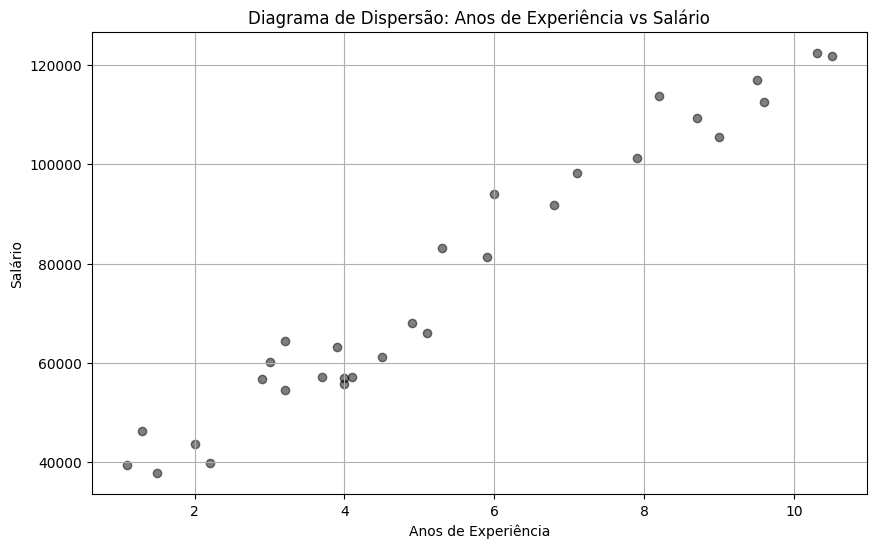

In [50]:
plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.scatter(df['YearsExperience'], df['Salary'], color='black', alpha=0.5)
plt.title('Diagrama de Dispersão: Anos de Experiência vs Salário')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.show()

## Exercício - 003

Ajuste o modelo de regressão para explicar a variável salário pela variável anos de experiência com a biblioteca _sklearn_.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
# Pre-processamento antes de fazer o modelo 

## Dividir os dados em variáveis independentes (X) e dependentes (y)
x = df[['YearsExperience']]  # Variável independente
y = df['Salary']  # Variável dependente

## Dividir os dados em treinamento e teste 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234)

In [53]:
# Criar o modelo de regressão linear e ajusta-lo aos dados de treinamento
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [54]:
# Fazer predições nos dados de teste
y_pred = modelo.predict(x_test)
print(y_pred)

[ 55189.56199083  61818.2885967   45719.95255387  37197.3040606
 122423.78899325  55189.56199083  43826.03066648 102537.60917563]


In [55]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [56]:
# Resultados
print(f'Coeficiente Angular (slope): {modelo.coef_[0]}')
print(f'Intercepto (intercept): {modelo.intercept_}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Coeficiente Angular (slope): 9469.609436960825
Intercepto (intercept): 24886.811792554574
Mean Squared Error: 41311944.29562261
R² Score: 0.9537029953588013


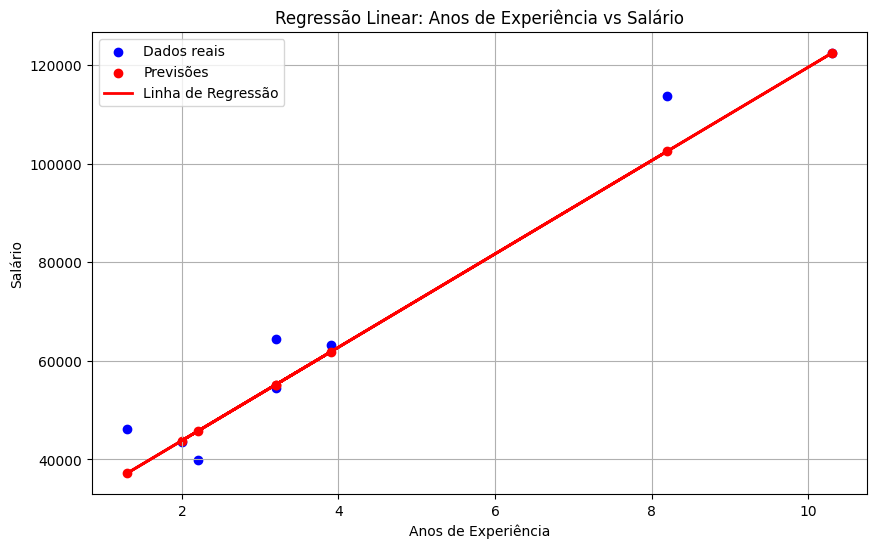

In [57]:
# Visualização - Resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Dados reais')
plt.scatter(x_test, y_pred, color='red', label='Previsões')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.title('Regressão Linear: Anos de Experiência vs Salário')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.legend()
plt.grid(True)
plt.show()

## Exercício - 004
Obtenha o coeficiente de determinação para o modelo ajustado e o coeficiente de correlação de _Pearson_. Qual a relação entre os coeficientes?

In [58]:
from scipy.stats import pearsonr as pear_cor

In [59]:
pearson_corr, _ = pear_cor(x['YearsExperience'], y)

print(f'Coeficiente de Correlação de Pearson: {pearson_corr}')
print(f'Coeficiente de Determinação (R²): {r2}')

Coeficiente de Correlação de Pearson: 0.9782416184887599
Coeficiente de Determinação (R²): 0.9537029953588013


### Relação entre os Coeficientes
O R² é o quadrado do coeficiente de correlação de Pearson quando se está lidando com uma única variável independente (no caso, anos de experiência).Portanto, se você calcular o coeficiente de correlação de Pearson e, em seguida, elevar esse valor ao quadrado, deve obter o coeficiente de determinação R². 

## Exercício - 005
Faça a predição do salário para a experiência de 4.3 anos de forma manual, e utilizando o método _predict_.

In [60]:
# Predição manual 
anos_experiencia = 4.3 # definindo a experiência
salario_manual = modelo.coef_[0] * anos_experiencia + modelo.intercept_ # usando a equação da reta

# Predição utilizando o método predict
salario_predict = modelo.predict([[anos_experiencia]])

print(f'Predição manual do salário para {anos_experiencia} anos de experiência: {salario_manual}')
print(f'Predição utilizando o método predict: {salario_predict[0]}')

Predição manual do salário para 4.3 anos de experiência: 65606.13237148612
Predição utilizando o método predict: 65606.13237148612


/home/joao/miniconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Exercício - 006
Ajuste o modelo de regressão com a biblioteca `statsmodels` e interprete a estatística F para o modelo de regressão.

In [40]:
! pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 2.3 MB/s eta 0:00:007.1 MB/s eta 0:00:01


In [61]:
import pandas as pd
import statsmodels.api as sm

In [62]:
# Adicionar uma constante ao modelo (termo de intercepto)
X = sm.add_constant(x)

# Ajustar o modelo de regressão
modelo = sm.OLS(y, X).fit()

# Resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.14e-20
Time:                        08:53:02   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

## Exercício - 007

Calcule os coeficientes para reta de regressão utilizando as seguinte formulações:

$
    \begin{align}
      \beta_1 &= \frac{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1}^n{(x_i-\bar{x})^2}}\\
      \beta_0 &= \bar{y} - \beta_1\bar{x}\
    \end{align}
$

## Exercício - 008
Faça o gráfico da reta sobre os pontos do conjunto de dados.
- Respondido conjuntamente ao exercício 3

## Exercício - 009

Leia o arquivo _kc_house_data.csv_, remova as colunas _id_ e _date_ e crie uma variável resposta com a coluna _price_ e outra variável contendo todas as colunas, exceto _price_.

In [65]:
import pandas as pd
url = "https://raw.githubusercontent.com/computational-chemical-biology/DataScience/master/exercicios/kc_house_data.csv"
df = pd.read_csv(url)
print("Antes do processamento dos dados:")
print(df.head())

Antes do processamento dos dados:
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_

In [66]:
# Processando a tabela 
## Remover as colunas 'id' e 'date'
df = df.drop(columns=['id', 'date'])

## Criar a variável de resposta com a coluna 'price'
y = df['price']

## Criar a variável com todas as colunas, exceto 'price'
X = df.drop(columns=['price'])

In [67]:
print("Após o processamento dos dados:")
print(df.head())
print("Variável resposta (y):")
print(y.head())
print("Variável preditora (X):")
print(X.head())

Após o processamento dos dados:
      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode  

## Exercício - 010
Utilize a função _pairplot_ da biblioteca `seaborn` para verificar a relação entre as variáveis: 'price',	'bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot'. Quais variáveis você diria que estão positivamente correlacionadas com o preço?

In [69]:
! pip install seaborn
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 822.4 kB/s eta 0:00:003.8 MB/s eta 0:00:01


In [70]:
# Indique as variáveis de interesse
selected_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
df_selected = df[selected_columns]
print(df_selected.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot
0  221900.0         3       1.00         1180      5650
1  538000.0         3       2.25         2570      7242
2  180000.0         2       1.00          770     10000
3  604000.0         4       3.00         1960      5000
4  510000.0         3       2.00         1680      8080


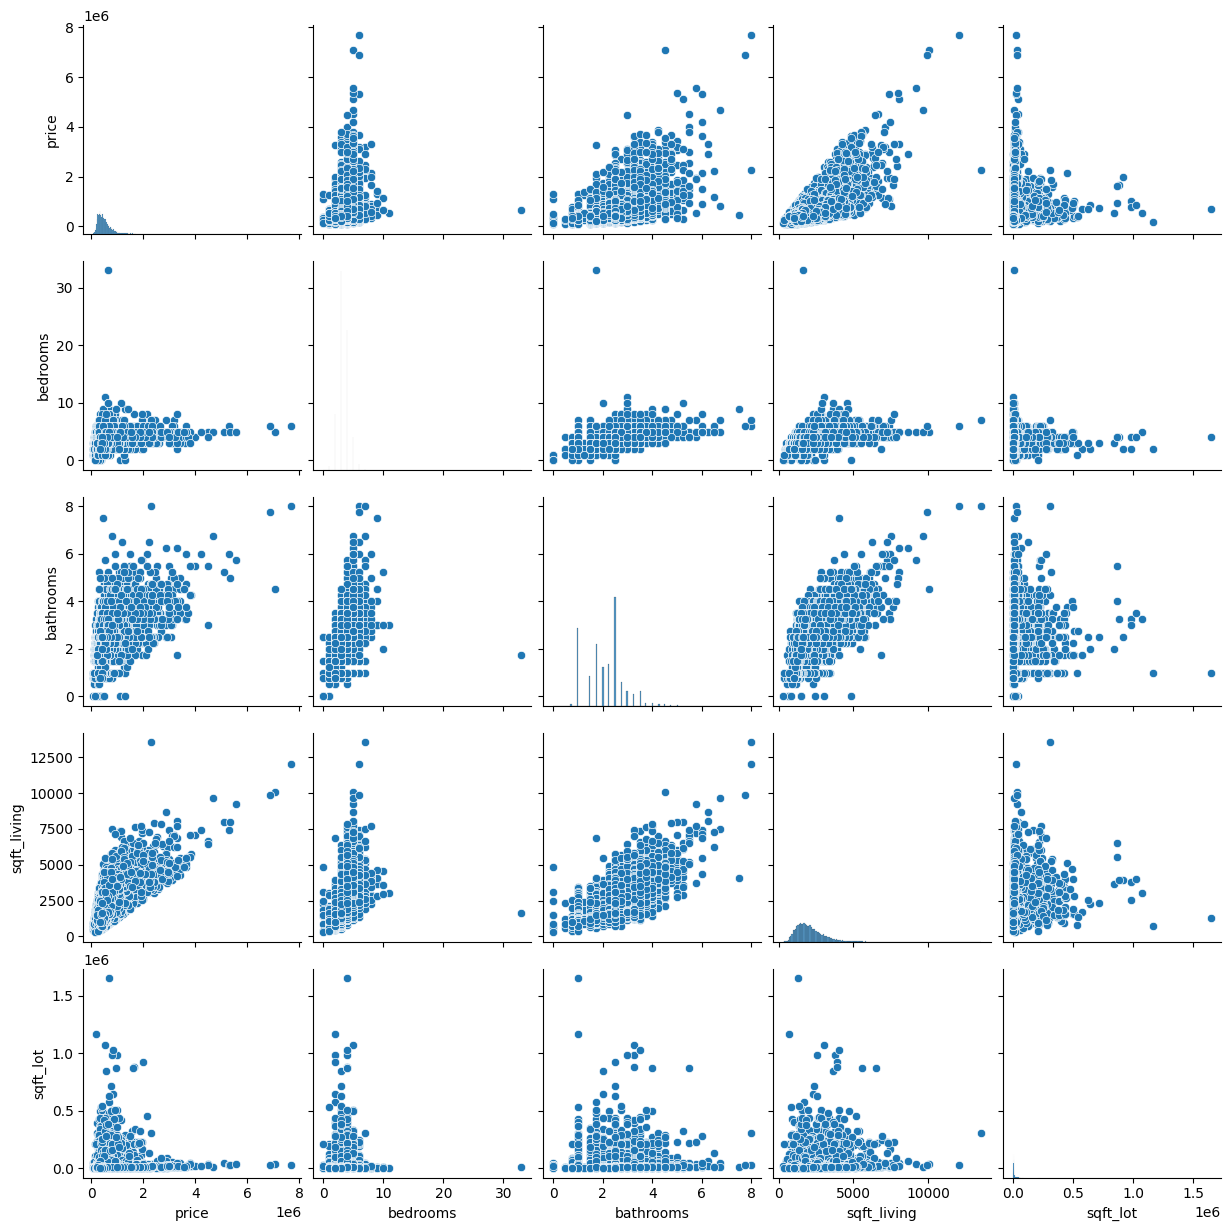

In [71]:
# Utilizar pairplot para verificar a relação entre as variáveis
sns.pairplot(df_selected)
plt.show()

## Exercício - 011
Repita o ajuste da regressão com a biblioteca `statsmodels`. Quais coeficientes são estatísticamente significantes?

In [72]:
# Dividir dados em variável dependente e independente 
y = df['price']  # Variável dependente (resposta)
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]  # Variáveis explicativas

# Adicionar intercepto
X = sm.add_constant(x)

# Ajustar o modelo de regressão
modelo = sm.OLS(y, X).fit()

# Resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     5592.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:15:29   Log-Likelihood:            -2.9993e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21608   BIC:                         5.999e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.909e+04   6918.599     11.432      

In [73]:
# Extrair coeficientes e valores-p
coeficientes = modelo.params
valores_p = modelo.pvalues

# Criar um DataFrame para visualizar coeficientes e valores-p
resultados = pd.DataFrame({'Coeficientes': coeficientes, 'Valores p': valores_p})

# Filtrar apenas os coeficientes com valores p significativos (p < 0.05)
significativos = resultados[resultados['Valores p'] < 0.05]

print("\nCoeficientes e Valores p Significativos:")
print(significativos)


Coeficientes e Valores p Significativos:
             Coeficientes      Valores p
const        79092.320402   3.540151e-30
bedrooms    -59406.812405  1.849757e-140
sqft_living    314.291721   0.000000e+00
sqft_lot        -0.377653   2.158622e-18


## Exercício - 012
Utilize a biblioteca [`sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) para executar a seleção de variáveis explicativas para regressão.

In [74]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [75]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um modelo de regressão linear
modelo = LinearRegression()

# Aplicar RFE para selecionar as variáveis
selector = RFE(estimator=modelo, n_features_to_select=2)  # Selecionar 2 variáveis
selector = selector.fit(X_train, y_train)

# Exibir quais variáveis foram selecionadas
variaveis_selecionadas = X.columns[selector.support_]

print("Variáveis selecionadas:")
print(variaveis_selecionadas)

Variáveis selecionadas:
Index(['bedrooms', 'bathrooms'], dtype='object')


## Exercício - 013
Divida o conjunto de dados _kc_house_data.csv_ em conjunto de treinamento e teste, ajuste o modelo de regressão múltipla no conjunto de treinamento e meça o ajuste no conjunto de teste.

In [76]:
# Ajustar o modelo no conjunto de treinamento
modelo.fit(X_train, y_train)

# Prever os preços no conjunto de teste
y_pred = modelo.predict(X_test)

# Medir o ajuste no conjunto de teste
mse = mean_squared_error(y_test, y_pred)  # Erro quadrático médio
r2 = r2_score(y_test, y_pred)  # R²

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Quadrático Médio (MSE): 74021241362.05
Coeficiente de Determinação (R²): 0.51


## Exercício - 014
Utilize os dados abaixo para ajustar os seguinte modelos de regressão polinomiais:

$
    \begin{align}
y = \beta_0+\beta_1x\\
y = \beta_0+\beta_1x+\beta_2x^2\\
y = \beta_0+\beta_1x+\beta_2x^2+\beta_3x^3
    \end{align}
$

Faça um gráfico com todos os modelos.

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [80]:
np.random.seed(50)  
x=np.linspace(-50,150,50)
y=0.15*x**3 - 20*x**2 + 5*x - 4 + 5000*np.random.randn(50)
print(x)
print(y)

[-50.         -45.91836735 -41.83673469 -37.75510204 -33.67346939
 -29.59183673 -25.51020408 -21.42857143 -17.34693878 -13.26530612
  -9.18367347  -5.10204082  -1.02040816   3.06122449   7.14285714
  11.2244898   15.30612245  19.3877551   23.46938776  27.55102041
  31.63265306  35.71428571  39.79591837  43.87755102  47.95918367
  52.04081633  56.12244898  60.20408163  64.28571429  68.36734694
  72.44897959  76.53061224  80.6122449   84.69387755  88.7755102
  92.85714286  96.93877551 101.02040816 105.10204082 109.18367347
 113.26530612 117.34693878 121.42857143 125.51020408 129.59183673
 133.67346939 137.75510204 141.83673469 145.91836735 150.        ]
[-76805.76054342 -57081.21629895 -49308.17632709 -44097.3212141
 -21518.05242365 -23936.08866833 -19539.50062243  -5419.42517266
 -13303.51982651 -10577.22906387  -1221.20979525   3740.92041707
   3453.59874997  -1844.63865557  -5921.65947595   5739.00511982
  12495.24140129  -1392.77478898  -8344.48137562  -8196.56607809
 -17080.24849686

In [81]:
# Reshape x para ser um array 2D
x = x.reshape(-1, 1)
print(x)

[[-50.        ]
 [-45.91836735]
 [-41.83673469]
 [-37.75510204]
 [-33.67346939]
 [-29.59183673]
 [-25.51020408]
 [-21.42857143]
 [-17.34693878]
 [-13.26530612]
 [ -9.18367347]
 [ -5.10204082]
 [ -1.02040816]
 [  3.06122449]
 [  7.14285714]
 [ 11.2244898 ]
 [ 15.30612245]
 [ 19.3877551 ]
 [ 23.46938776]
 [ 27.55102041]
 [ 31.63265306]
 [ 35.71428571]
 [ 39.79591837]
 [ 43.87755102]
 [ 47.95918367]
 [ 52.04081633]
 [ 56.12244898]
 [ 60.20408163]
 [ 64.28571429]
 [ 68.36734694]
 [ 72.44897959]
 [ 76.53061224]
 [ 80.6122449 ]
 [ 84.69387755]
 [ 88.7755102 ]
 [ 92.85714286]
 [ 96.93877551]
 [101.02040816]
 [105.10204082]
 [109.18367347]
 [113.26530612]
 [117.34693878]
 [121.42857143]
 [125.51020408]
 [129.59183673]
 [133.67346939]
 [137.75510204]
 [141.83673469]
 [145.91836735]
 [150.        ]]


In [82]:
# Ajustar os modelos de regressão polinomial
models = {}
degrees = [1, 2, 3]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    models[degree] = model

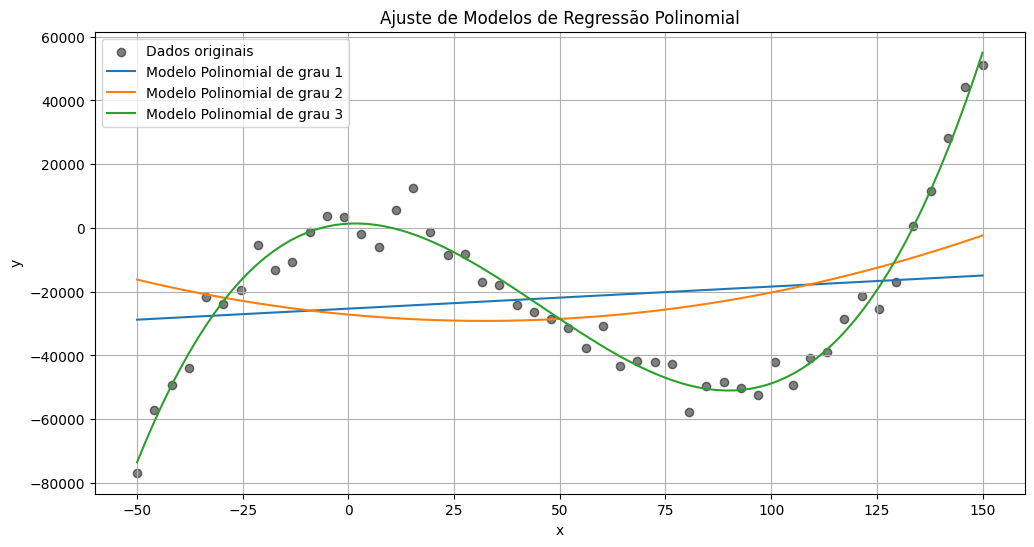

In [84]:
# Criar um gráfico
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='black', label='Dados originais', alpha=0.5)

# Gerar pontos para plotar as predições
x_plot = np.linspace(-50, 150, 100).reshape(-1, 1)

for degree, model in models.items():
    poly = PolynomialFeatures(degree=degree)
    X_plot_poly = poly.fit_transform(x_plot)
    
    y_pred = model.predict(X_plot_poly)
    plt.plot(x_plot, y_pred, label=f'Modelo Polinomial de grau {degree}')

# Configurações do gráfico
plt.title('Ajuste de Modelos de Regressão Polinomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()